# Japan vs. China
### Examining some preliminary infection ratios/trends, we have developed a theory that the Chinese government may be misrepresenting the number of infections they continue to have. To analyze our theory, we are going to compare the reported numbers from Japan in this file and South Korea in another file (all in the master as well). 

## Japan

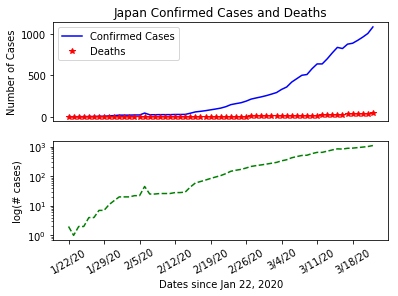

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try: 
    confirmed_df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print('Something went wrong. Check path, and make sure you have the latest file updates.')
    exit()
try: 
    deaths_df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
except IOError:
    print('Something went wrong. Check path, and make sure you have the latest file updates.')
    exit()
# Slicing out all the Japan data
japan_dfc = confirmed_df[confirmed_df['Country/Region'] == 'Japan']
japan_dfd = deaths_df[deaths_df['Country/Region'] == 'Japan']
# Removing extraneous data from df
japan_dfc = japan_dfc.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
japan_dfd = japan_dfd.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
# summing columns
japan_dfc = japan_dfc.sum()
japan_dfd = japan_dfd.sum()
# creating dataframes for plotting
japan_dict_conf = {'Japan Total':japan_dfc}
japan_df_conf = pd.DataFrame(japan_dict_conf)
japan_dict_dead = {'Japan Total':japan_dfd}
japan_df_dead = pd.DataFrame(japan_dict_dead)

# Plotting data
# Confirmed Cases & Deaths
fig = plt.figure()
plt.subplot(211)
plt.title('Japan Confirmed Cases and Deaths')
plt.ylabel('Number of Cases')
plt.xticks([])
plt.plot(japan_df_conf,'b-', label='Confirmed Cases')
plt.plot(japan_df_dead, 'r*', label='Deaths')
plt.legend()

# log y axis
plt.subplot(212)
plt.yscale('log')
plt.ylabel('Number of Cases')
plt.xticks(np.arange(0,len(japan_df_conf),step=7), rotation=30)
plt.xlabel('Dates since Jan 22, 2020')
plt.ylabel('log(# cases)')
plt.plot(japan_df_conf, 'g--')
plt.show()

## China

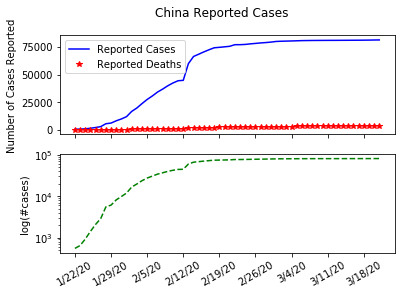

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try: 
    dfc = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print('Something went wrong. Check path, and make sure you have the latest file updates.')
    exit()
try: 
    dfd = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
except IOError:
    print('Something went wrong. Check path, and make sure you have the latest file updates.')
    exit()
# Slicing out China
china_dfc = dfc[dfc['Country/Region'] == 'China']
china_dfd = dfd[dfd['Country/Region'] == 'China']
# Dropping irrelevant data
china_dfc = china_dfc.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
china_dfd = china_dfd.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
# summing data
china_dfc = china_dfc.sum()
china_dfd = china_dfd.sum()
# new dataframes for plotting
china_dict_conf = {'China Total': china_dfc}
china_df_conf = pd.DataFrame(china_dict_conf)
china_dict_dead = {'China Total': china_dfd}
china_df_dead = pd.DataFrame(china_dict_dead)

# Plotting data
# Confirmed cases & deaths
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('China Reported Cases')
ax1.set_ylabel('Number of Cases Reported')
ax1.plot(china_df_conf, 'b-', label='Reported Cases')
ax1.plot(china_df_dead, 'r*', label='Reported Deaths')
ax1.legend()

# Log y axis
plt.yscale('log')
plt.xticks(np.arange(0,len(china_df_conf), step=7), rotation=30)
ax2.set_ylabel('log(#cases)')
ax2.plot(china_df_conf, 'g--')
plt.show()

# Let's put them together

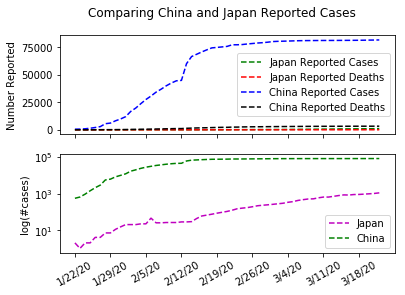

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try: 
    dfc = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print('Something went wrong. Check path, and make sure you have the latest file updates.')
    exit()
try: 
    dfd = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
except IOError:
    print('Something went wrong. Check path, and make sure you have the latest file updates.')
    exit()
# Slicing out Japan
japan_dfc = dfc[dfc['Country/Region'] == 'Japan']
japan_dfd = dfd[dfd['Country/Region'] == 'Japan']
# Removing extraneous data from df
japan_dfc = japan_dfc.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
japan_dfd = japan_dfd.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
# summing columns
japan_dfc = japan_dfc.sum()
japan_dfd = japan_dfd.sum()
# creating dataframes for plotting
japan_dict_conf = {'Japan Total':japan_dfc}
japan_df_conf = pd.DataFrame(japan_dict_conf)
japan_dict_dead = {'Japan Total':japan_dfd}
japan_df_dead = pd.DataFrame(japan_dict_dead)

# Slicing out China
china_dfc = dfc[dfc['Country/Region'] == 'China']
china_dfd = dfd[dfd['Country/Region'] == 'China']
# Dropping irrelevant data
china_dfc = china_dfc.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
china_dfd = china_dfd.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
# summing data
china_dfc = china_dfc.sum()
china_dfd = china_dfd.sum()
# new dataframes for plotting
china_dict_conf = {'China Total': china_dfc}
china_df_conf = pd.DataFrame(china_dict_conf)
china_dict_dead = {'China Total': china_dfd}
china_df_dead = pd.DataFrame(china_dict_dead)

# Plotting data
# Confirmed cases & deaths
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Comparing China and Japan Reported Cases')
ax1.set_ylabel('Number Reported')
ax1.plot(japan_df_conf, 'g--', label='Japan Reported Cases')
ax1.plot(japan_df_dead, 'r--', label='Japan Reported Deaths')
ax1.plot(china_df_conf, 'b--', label='China Reported Cases')
ax1.plot(china_df_dead, 'k--', label='China Reported Deaths')
ax1.legend()

# log y axis
plt.yscale('log')
plt.xticks(np.arange(0,len(china_df_conf), step=7), rotation=30)
ax2.set_ylabel('log(#cases)')
ax2.plot(japan_df_conf, 'm--', label='Japan')
ax2.plot(china_df_conf, 'g--', label='China')
plt.legend(loc='lower right')
plt.show()